## Testing gdal2fits.py and reloading created FITS

In [1]:
import gdal
import astropy
import numpy
import os

filepath='..' 
os.chdir(filepath)

In [2]:
fitsFile = 'mc9_test.fits'
os.remove(fitsFile)
%run gdal2fits.py mc19_margaritifer_400m.cub $fitsFile

In [3]:
os.remove(fitsFile)
%run gdal2fits.py -debug mc19_margaritifer_400m.cub $fitsFile

Driver: ISIS3/USGS Astrogeology ISIS cube (Version 3)
Files: mc19_margaritifer_400m.cub
Size is 6669, 4446
Coordinate System is:
PROJCS["SimpleCylindrical Mars",
    GEOGCS["GCS_Mars",
        DATUM["D_Mars",
            SPHEROID["Mars",3396190,0]],
        PRIMEM["Reference_Meridian",0],
        UNIT["degree",0.0174532925199433]],
    PROJECTION["Equirectangular"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",180],
    PARAMETER["standard_parallel_1",0],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0]]
Origin = (8002000.000000000000000,0.000000000000000)
Pixel Size = (400.000000000000000,-400.000000000000000)
Corner Coordinates:
Upper Left  ( 8002000.000,       0.000) ( 45d 0' 5.11"W,  0d 0' 0.01"N)
Lower Left  ( 8002000.000,-1778400.000) ( 45d 0' 5.11"W, 30d 0' 9.66"S)
Upper Right (10669600.000,       0.000) (  0d 0' 9.38"E,  0d 0' 0.01"N)
Lower Right (10669600.000,-1778400.000) (  0d 0' 9.38"E, 30d 0' 9.66"S)
Center      ( 9335800.000, 

In [12]:
#fits.info(fitsFile)
hdulist = fits.open(fitsFile)
hdulist.info()

Filename: mc9_test.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      17   (6669, 4446)   uint8   


In [15]:
image_data = fits.getdata(fitsFile, ext=0)
print(image_data.shape)

(4446L, 6669L)


(500L, 500L)


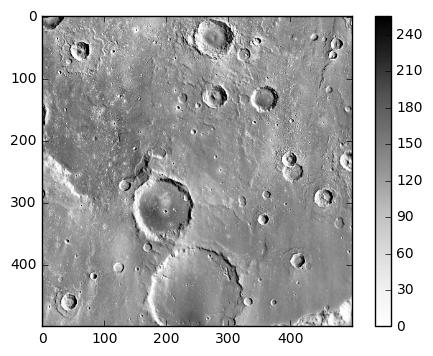

In [16]:
import matplotlib.pyplot as plt
sub_image = image_data[500:1000,500:1000]
print(sub_image.shape)

plt.imshow(sub_image, cmap=plt.cm.Greys)
plt.colorbar()
plt.show()

Note the FITS header is still not fully created

In [19]:
hdu = hdulist[0]
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6669                                                  
NAXIS2  =                 4446                                                  
EXTEND  =                    T                                                  
BZERO   =                  0.0                                                  
BSCALE  =                  1.0                                                  
OBJECT  = 'Mars    '                                                            
CTYPE1  = 'CAR     '                                                            
A_RADIUS=            3396190.0                                                  
B_RADIUS=            3396190.0                                                  
C_RADIUS=            3396190